No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


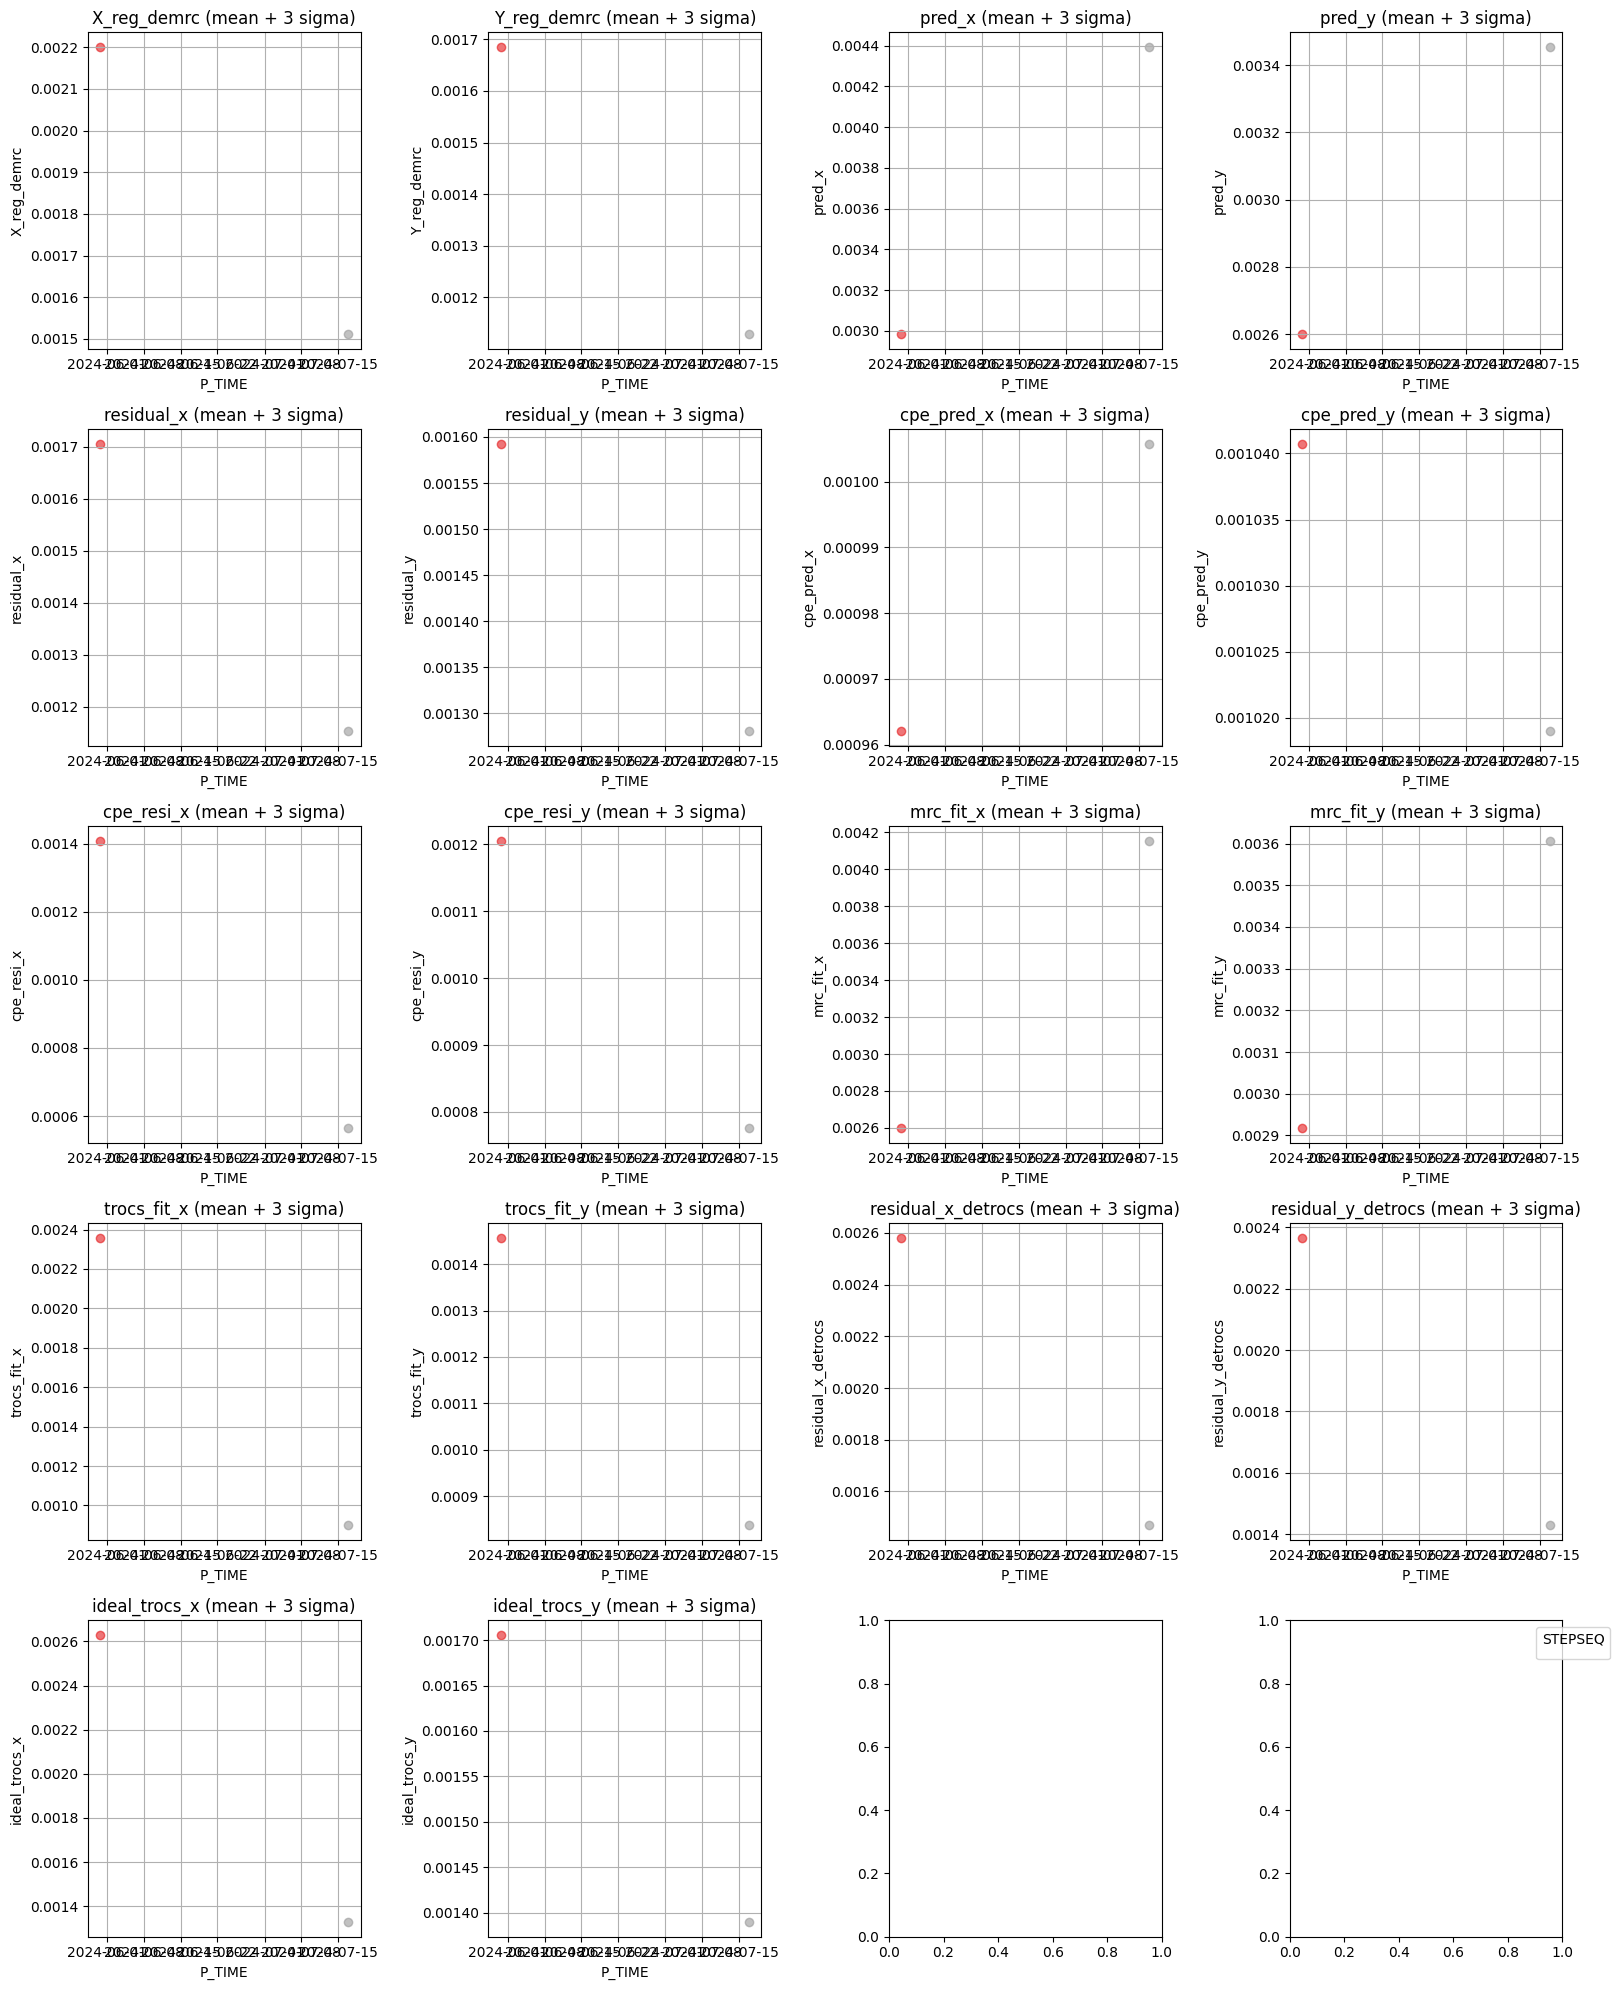

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 엑셀 파일을 읽어옵니다.
file_path = 'output.xlsx'  # 여기에 파일 경로를 입력하세요
df = pd.read_excel(file_path, sheet_name='Ideal TROCS')

# 분석하고자 하는 열 목록
columns_to_analyze = [
    'X_reg_demrc', 'Y_reg_demrc', 'pred_x', 'pred_y', 'residual_x', 'residual_y', 
    'cpe_pred_x', 'cpe_pred_y', 'cpe_resi_x', 'cpe_resi_y', 'mrc_fit_x', 'mrc_fit_y',
    'trocs_fit_x', 'trocs_fit_y', 'residual_x_detrocs', 'residual_y_detrocs', 
    'ideal_trocs_x', 'ideal_trocs_y'
]

# STEPSEQ별로 색상을 자동으로 설정합니다.
unique_stepseq = df['STEPSEQ'].unique()
colors = plt.cm.get_cmap('Set1', len(unique_stepseq))

# 그래프의 행과 열 배치 설정 (4x5로 설정, 그래프의 수에 맞게 조정 가능)
n_rows, n_cols = 5, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))
axes = axes.ravel()  # 행렬 형태의 axes를 1D array로 변환하여 편리하게 접근

# 각 열에 대해 분석하고 그래프를 생성합니다.
for i, column in enumerate(columns_to_analyze):
    grouped_data = df.groupby('UNIQUE_ID').agg(
        mean_col=(column, 'mean'),
        std_col=(column, 'std'),
        P_TIME=('P_TIME', 'first'),
        STEPSEQ=('STEPSEQ', 'first')
    )
    grouped_data['mean_plus_3sigma'] = grouped_data['mean_col'] + 3 * grouped_data['std_col']

    ax = axes[i]  # 각 subplot에 접근
    for j, stepseq in enumerate(unique_stepseq):
        subset = grouped_data[grouped_data['STEPSEQ'] == stepseq]
        ax.scatter(pd.to_datetime(subset['P_TIME']), subset['mean_plus_3sigma'], 
                   color=colors(j), label=f'STEPSEQ: {stepseq}', alpha=0.6)
    
    ax.set_title(f'{column} (mean + 3 sigma)')
    ax.set_xlabel('P_TIME')
    ax.set_ylabel(f'{column}')
    ax.grid(True)

# 그래프 간격을 자동 조정하고, 필요시 범례 추가
plt.tight_layout()
plt.legend(title='STEPSEQ', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()
